![Twitter Sentiment Analysis](tt.png)

# Sentiment Analysis From Scratch: A Deep Dive into Twitter Data
### Notebook 1: Data Visualization and Cleaning.

In this initial notebook, the focus lies on preparing and cleaning the data for sentiment analysis. The journey starts with an initial visualization of the data, offering a clear understanding of the dataset before any processing is undertaken. This is followed by a rigorous text pre-processing and cleaning process, which involves:

- Removing irrelevant words, known as "stop-words".
- Eliminating punctuation and accented characters.
- Applying "stemming" to reduce words to their root form.
- Excluding non-alphabetic characters.

After these steps, the notebook presents a view of the most frequent words, giving an insight into the nature of the content post-cleaning. Finally, the cleaned and processed data is saved in a CSV format, setting the stage for the subsequent stages of the project which involve modeling and analysis.

---

### [About Sentiment140 dataset](https://www.kaggle.com/datasets/kazanova/sentiment140?datasetId=2477&sortBy=voteCount)



The dataset used in this project was obtained from [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140?datasetId=2477&sortBy=voteCount). It contains 1.6 million tweets classified as negative or positive.

| Column | Description |
|:---------------------:|:-------------:|
| target              | The polarity of the tweet (0 = negative, 2 = neutral, 4 = positive) |
| ids                 | The ID of the tweet (example: 2087) |
| date                | The date of the tweet (example: Sat May 16 23:58:44 UTC 2009) |
| flag                | The query (example: lyx). If there is no query, then this value is NO_QUERY |
| user                | The user who tweeted (example: robotickilldozr) |
| text                | The text of the tweet (example: Lyx is cool) |

---
## Importing Libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np

from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator
from nltk import tokenize

%matplotlib inline

***

## Data Loading and Exploratory Data Analysis (EDA)


In [2]:
tweets = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', names=["target", "ids", "date", "flag", "user", "text"])

tweets.head()

target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [3]:
tweets.drop(['ids','date','flag','user'],axis=1, inplace=True)
tweets['target'] = tweets['target'].replace(4,1)
tweets

target                                               text
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1             0  is upset that he can't update his Facebook by ...
2             0  @Kenichan I dived many times for the ball. Man...
3             0    my whole body feels itchy and like its on fire 
4             0  @nationwideclass no, it's not behaving at all....
...         ...                                                ...
1599995       1  Just woke up. Having no school is the best fee...
1599996       1  TheWDB.com - Very cool to hear old Walt interv...
1599997       1  Are you ready for your MoJo Makeover? Ask me f...
1599998       1  Happy 38th Birthday to my boo of alll time!!! ...
1599999       1  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]

In [4]:
negative_tweets = tweets[tweets['target'] == 0]
negative_tweets['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [5]:
positive_tweets = tweets[tweets['target'] == 1]
positive_tweets['text'].head()

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [6]:
tgp = tweets.groupby('target').count()
tgp

text
target        
0       800000
1       800000

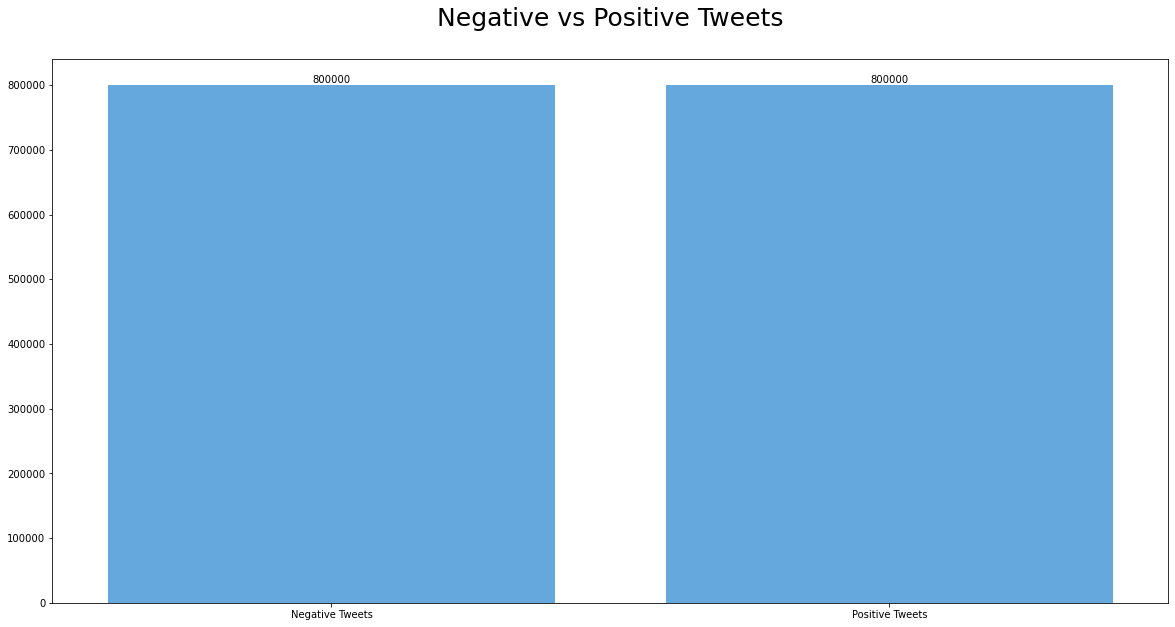

In [7]:
plt.figure(figsize = (20,10))
plt.title('Negative vs Positive Tweets',fontsize=25, y=1.05)
colors = ["#50abf1", "#50abf1"]
#
ax = sns.countplot(x=tweets.target, palette = colors)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

ax.xaxis.set_ticklabels(['Negative Tweets', 'Positive Tweets'])    
ax.set_xlabel('');
ax.set_ylabel('');
plt.show()

***

## Data visualization before cleaning

In [8]:
image = Image.open('Twitter.jpeg')
color_generator = ImageColorGenerator(np.array(image))

def plot_wc(dataframe, column, title):
    words = ' '.join([text for text in dataframe[column]])
    
    wc = WordCloud(width=800, 
               height=400, 
               max_font_size=100, 
               background_color='white', 
               color_func=color_generator).generate(words)
    
    plt.rcParams['figure.figsize'] = [18, 23]
    plt.title(title, fontsize=60, color='#2583bd')
    plt.axis('off');
    plt.imshow(wc);

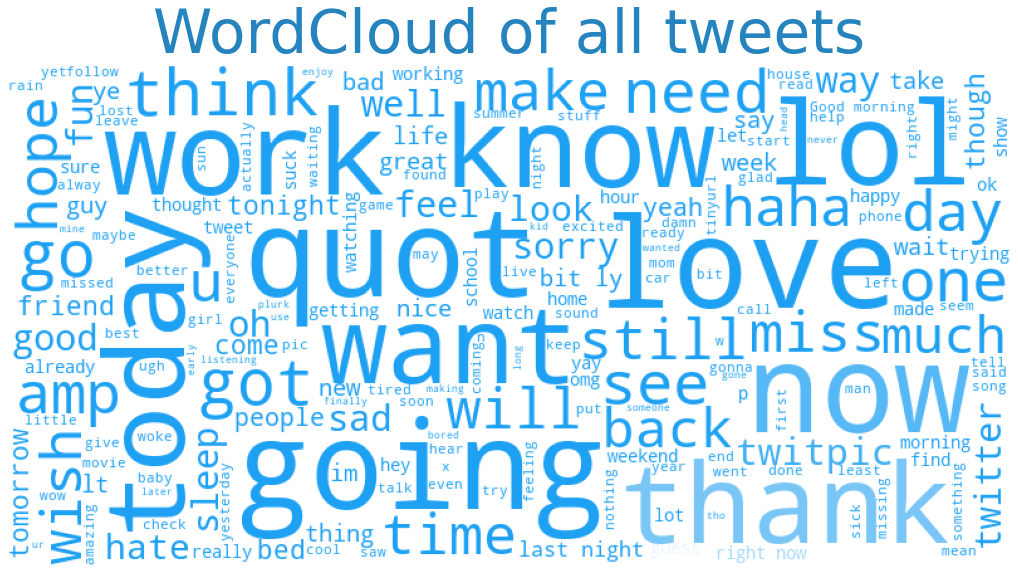

In [9]:
plot_wc(tweets, 'text', 'WordCloud of all tweets')

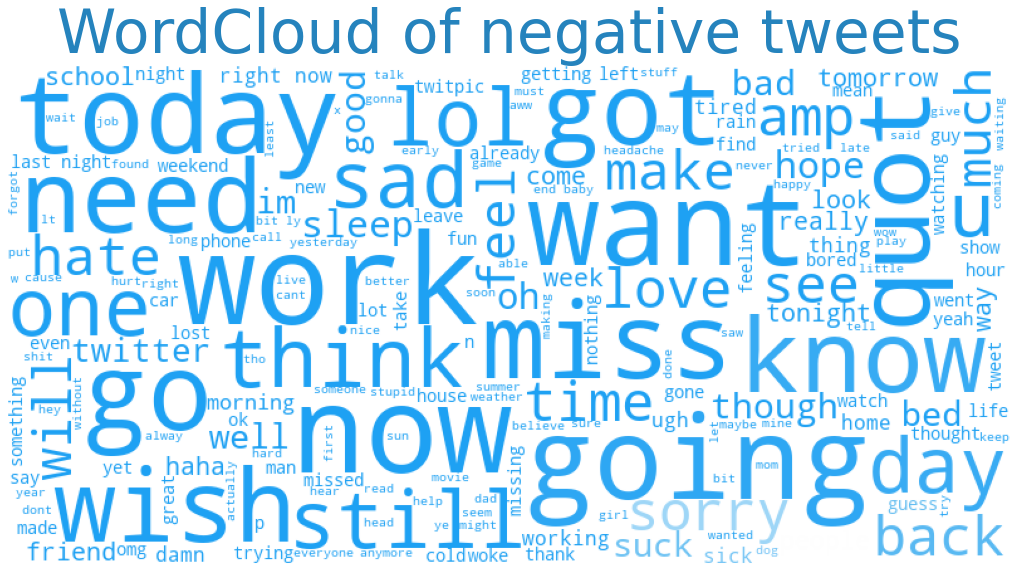

In [10]:
plot_wc(negative_tweets, 'text', 'WordCloud of negative tweets')

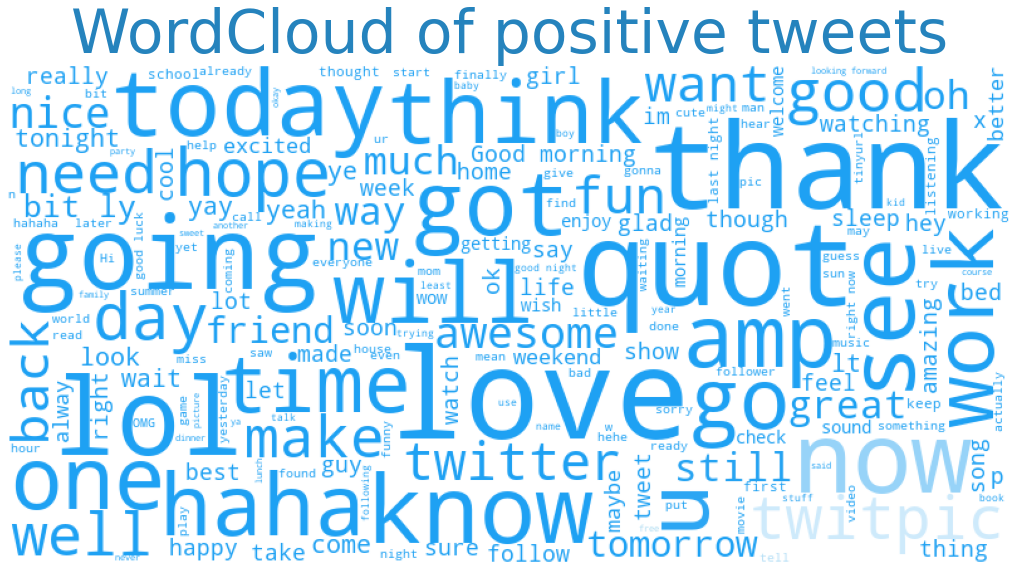

In [11]:
plot_wc(positive_tweets, 'text', 'WordCloud of positive tweets')

In [12]:
def barplot (dataframe, column, title):
    words = ' '.join([text for text in dataframe[column]])
    ws_tokenizer = tokenize.WhitespaceTokenizer()
    tokens = ws_tokenizer.tokenize(words)
    freq = nltk.FreqDist(tokens)
    
    df_freq = pd.DataFrame({'Word': list(freq.keys()), 'Frequency': list(freq.values())})
    top_25 = df_freq.nlargest(columns = 'Frequency', n=25)
    
    plt.figure(figsize=(18,10))
    ax = sns.barplot (data = top_25, x='Word', y='Frequency', color='#50abf1');
    ax.set_title(title, fontsize=24);

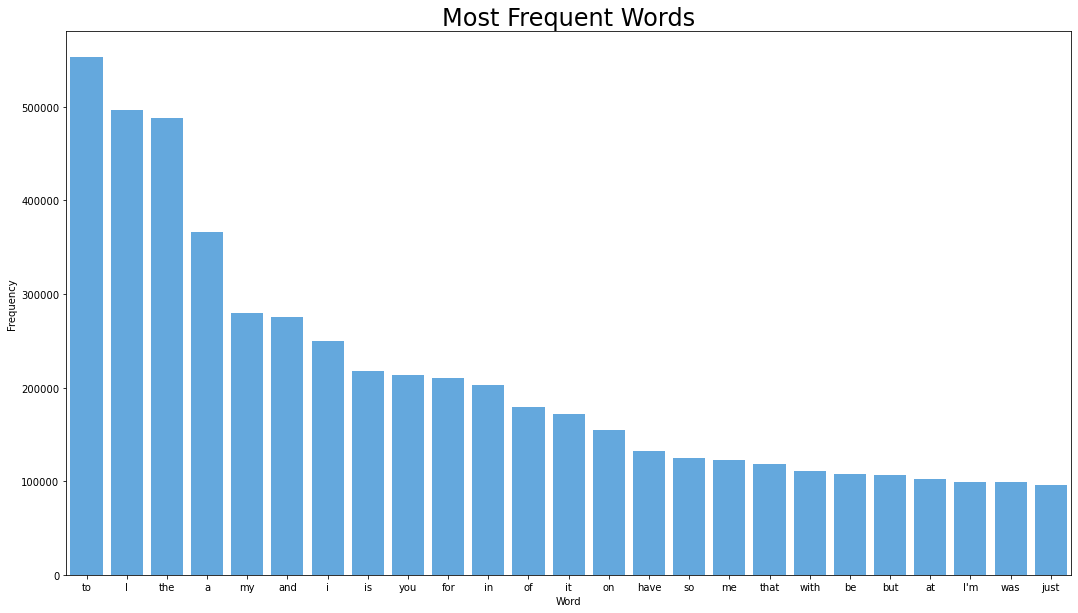

In [13]:
barplot(tweets, 'text', 'Most Frequent Words')

***

## Pre-processing and cleaning text data

### Elimination of Irrelevant Words (Stop-words)

The first step in data cleaning is to remove what's called "stop-words". Stop-words are words that are commonly used in a language, but typically do not carry significant meaning for text analysis (for example, "a", "an", "the" in English). Here, the list of stop-words is obtained from the NLTK (Natural Language Toolkit) package, which is a popular library for natural language processing.

The following code is used to get the list of English stop-words:

In [14]:
stop_words = nltk.corpus.stopwords.words("english")

In [15]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
ws_tokenizer = tokenize.WhitespaceTokenizer()
new_tweets = []

for tweet in tweets.text:
    ntweet = list()
    words = ws_tokenizer.tokenize(tweet)
    for word in words:
        if (word.lower() not in stop_words) and (word.lower().startswith("http")==False) and (word.lower().startswith("&")==False):
            ntweet.append(word.lower())
    new_tweets.append(' '.join(ntweet))
    
tweets['text2'] = new_tweets

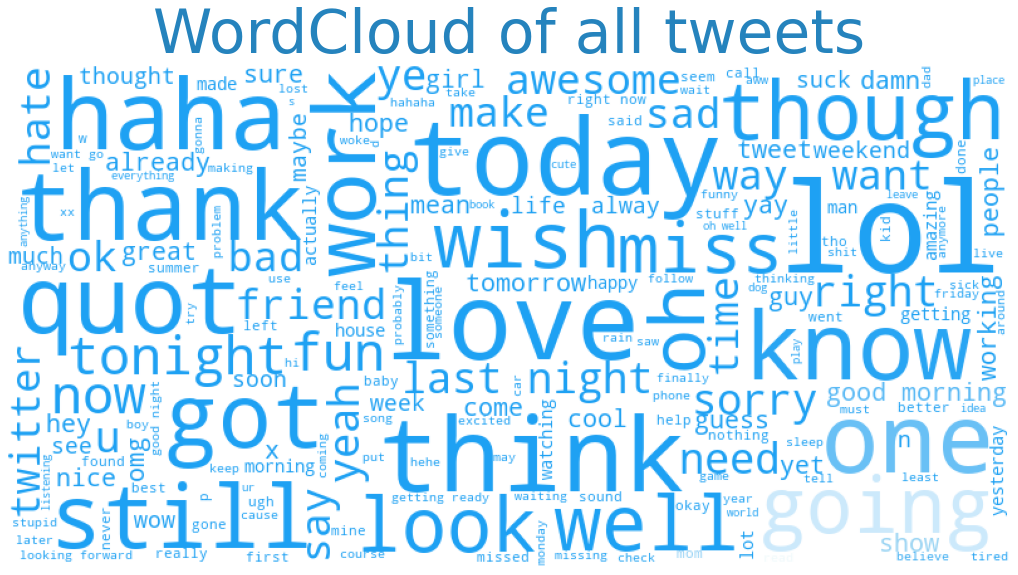

In [17]:
plot_wc(tweets, 'text2', 'WordCloud of all tweets')

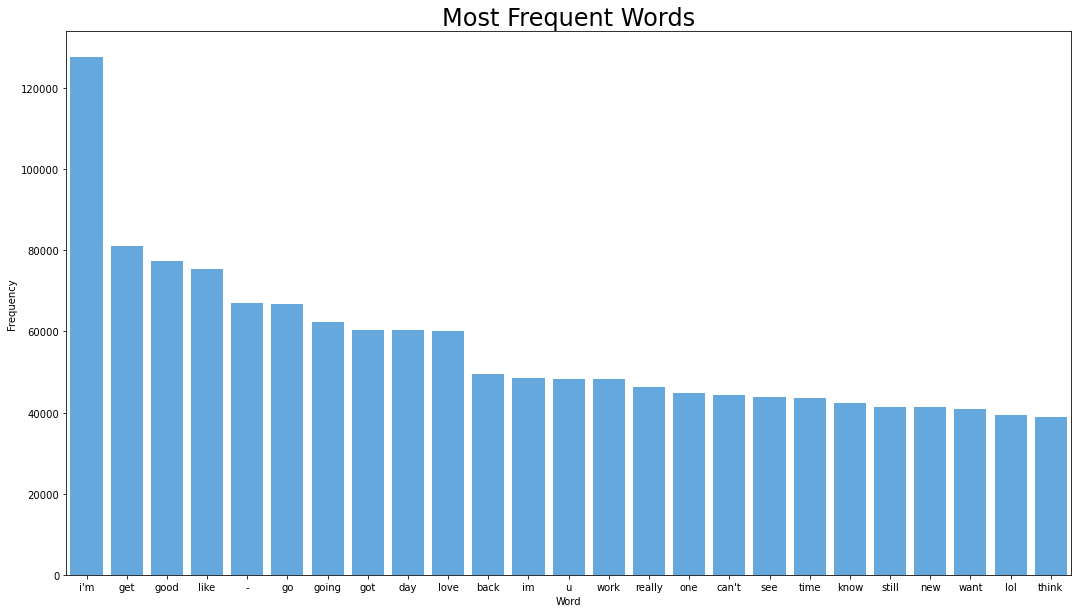

In [18]:
barplot(tweets, 'text2', 'Most Frequent Words')

### Elimination of Punctuation Characters

The purpose of this step is to simplify the text and remove potential sources of noise in the data, as punctuation often does not contribute significant meaningful information for machine learning models.

In [19]:
#creating a list with all punctuations
from string import punctuation
    
punc_lst = []

for p in punctuation:
    punc_lst.append(p)

In [20]:
punc_tokenizer = tokenize.WordPunctTokenizer()
stop_words2 = stop_words + punc_lst
new_tweets = []

for tweet in tweets.text2:
    ntweet = list()
    words = punc_tokenizer.tokenize(tweet)
    for word in words:
        if word not in stop_words2:
            ntweet.append(word)
    new_tweets.append(' '.join(ntweet))
    
tweets['text3'] = new_tweets

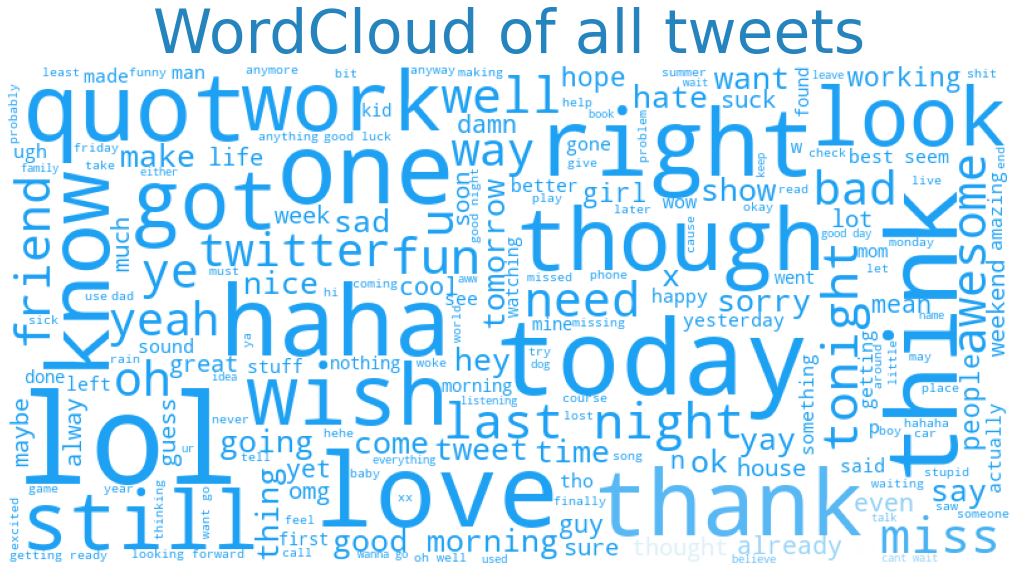

In [21]:
plot_wc(tweets, 'text3', 'WordCloud of all tweets')

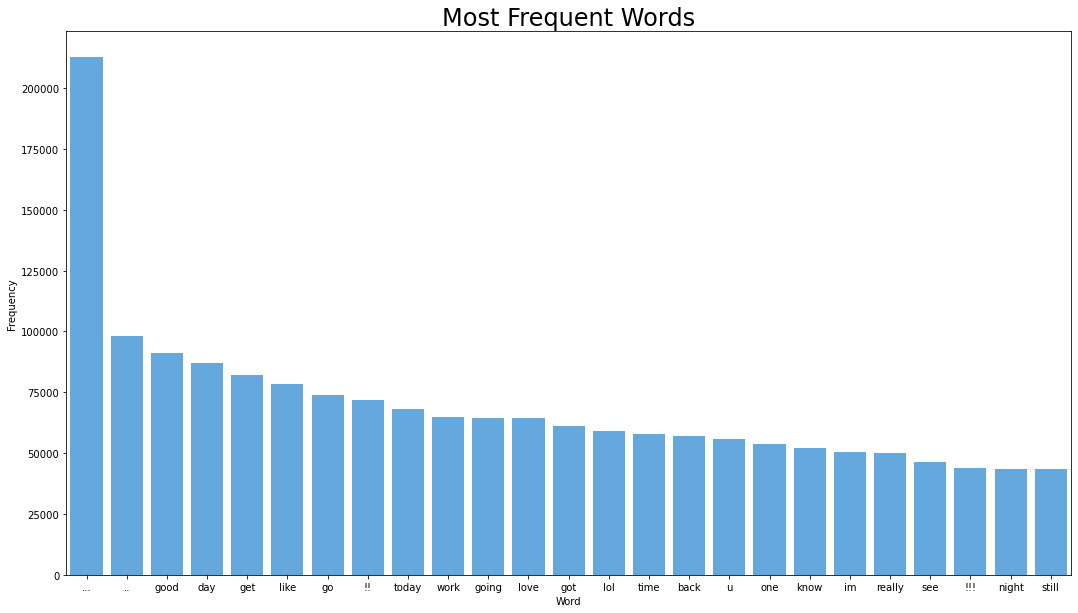

In [22]:
barplot(tweets, 'text3', 'Most Frequent Words')

### Elimination of accentuation

In this section, characters with accentuation (such as "é", "â", "ü") are replaced with their unaccented equivalents (like "e", "a", "u"). This step simplifies the text data and can help improve the consistency and effectiveness of later text analysis tasks.

In [23]:
import unidecode

tweets['text4'] = [unidecode.unidecode(text) for text in tweets.text3]
stop_words3 = [unidecode.unidecode(text) for text in stop_words2]

new_tweets = []

for tweet in tweets.text4:
    ntweet = list()
    words = punc_tokenizer.tokenize(tweet)
    for word in words:
        if word not in stop_words3:
            ntweet.append(word)
    new_tweets.append(' '.join(ntweet))
    
tweets['text4'] = new_tweets

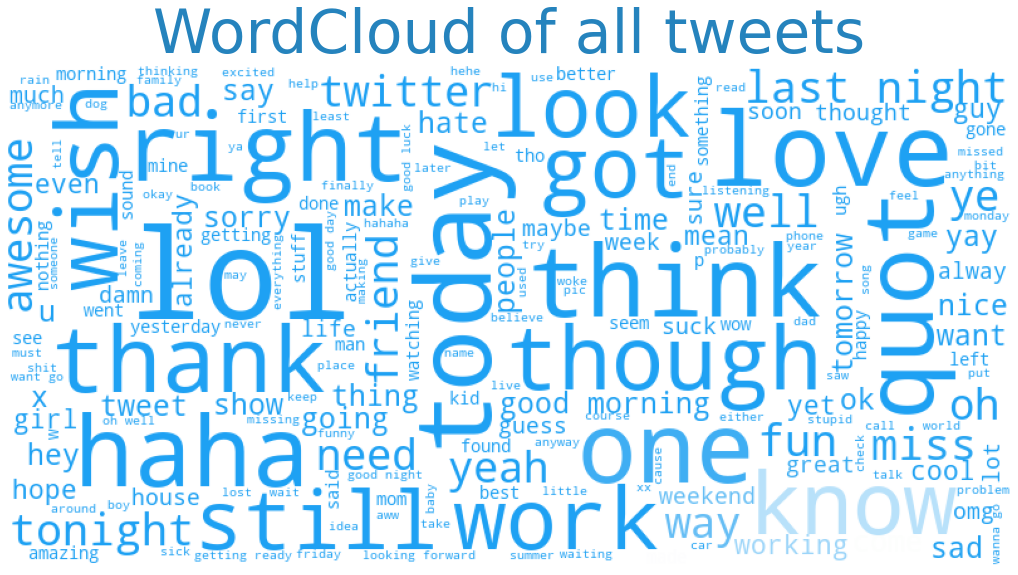

In [24]:
plot_wc(tweets, 'text4', 'WordCloud of all tweets')

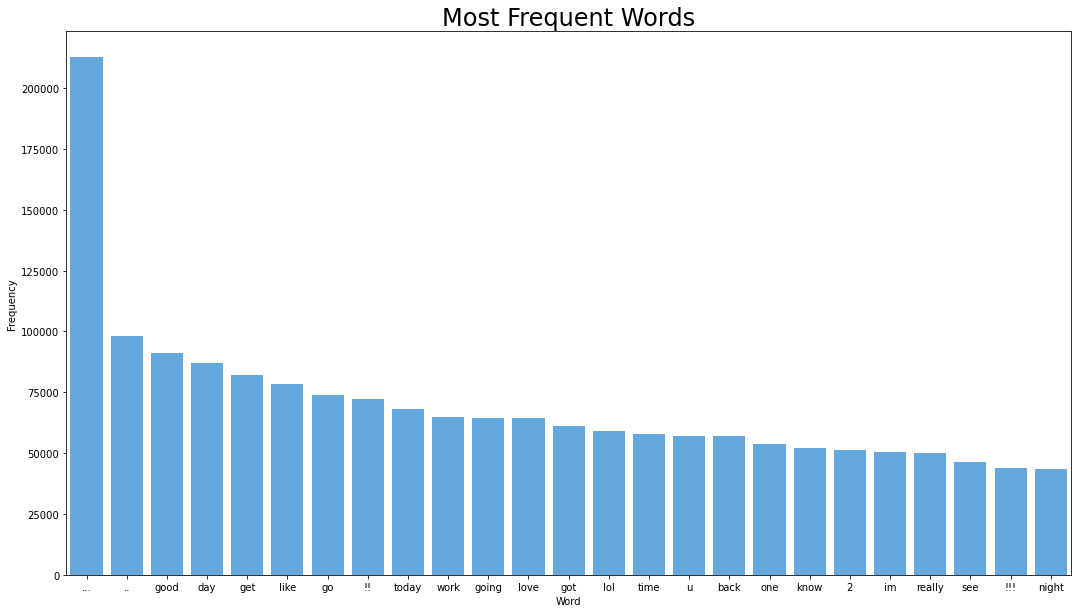

In [25]:
barplot(tweets, 'text4', 'Most Frequent Words')

### Applying Stemming to Text Data

In this section, the code performs stemming on the text data. Stemming is a text normalization technique that reduces words to their root or basic form (known as the 'stem'). For instance, 'running', 'runs', and 'ran' would all be reduced to the stem 'run'. This process can help consolidate similar words and can improve the effectiveness of later text analysis tasks.

In [26]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

new_tweets = []

for tweet in tweets.text4:
    ntweet = list()
    words = punc_tokenizer.tokenize(tweet)
    for word in words:
        if word not in stop_words3:
            ntweet.append(porter.stem(word))
    new_tweets.append(' '.join(ntweet))
    
tweets['text5'] = new_tweets

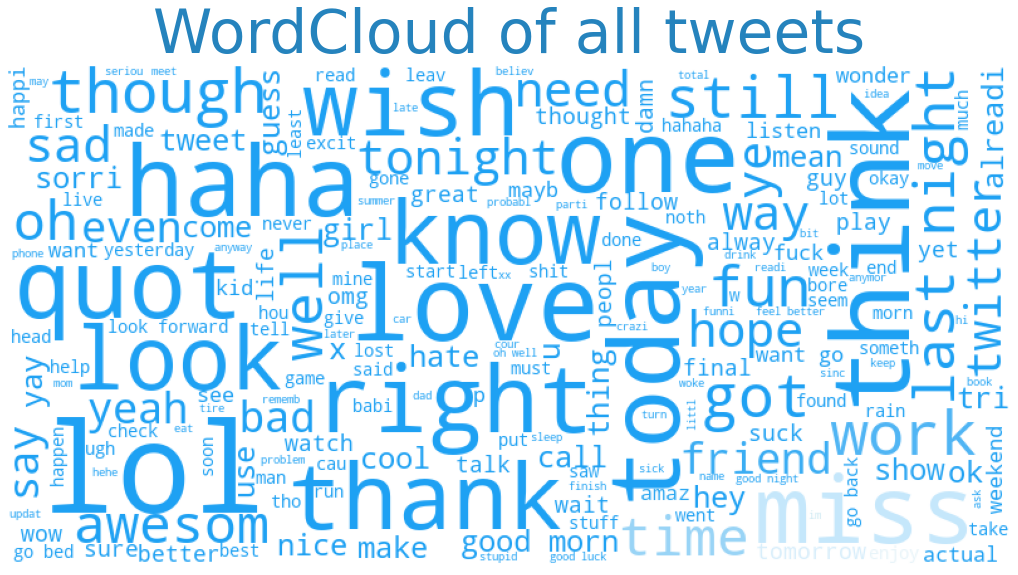

In [27]:
plot_wc(tweets, 'text5', 'WordCloud of all tweets')

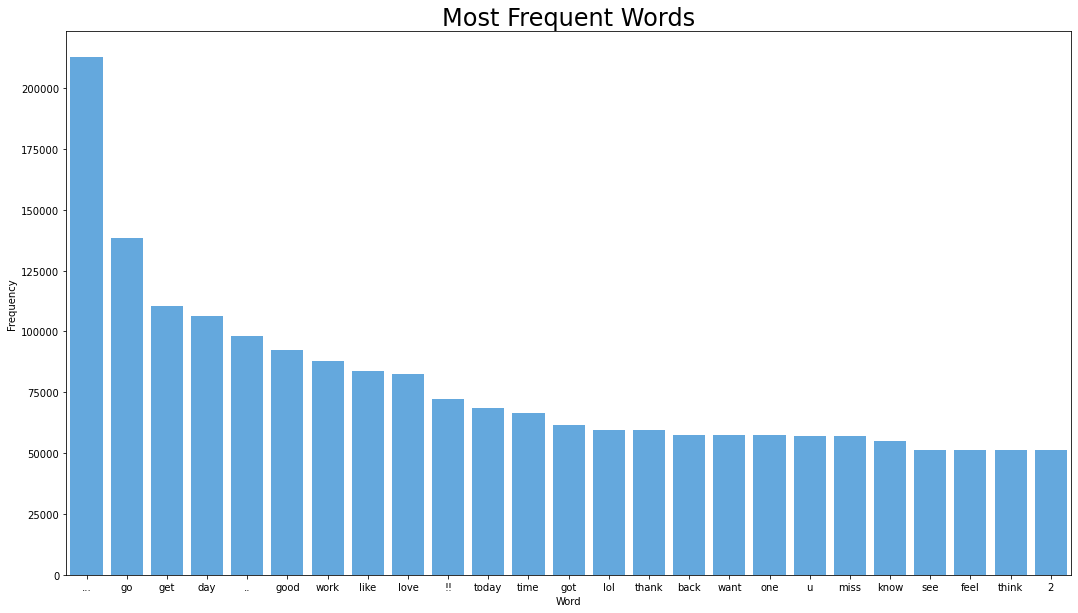

In [28]:
barplot(tweets, 'text5', 'Most Frequent Words')

### Removal of Non-Alphabetic Characters from Text Data

In this section, all words that contain characters which are not part of the standard English alphabet (a-z) are removed. This includes numbers, special characters, and possibly non-English letters. The aim of this step is to simplify the text data and ensure consistency in the dataset, aiding in the effectiveness of later text analysis tasks.

In [29]:
new_tweets = []

for tweet in tweets.text5:
    ntweet = list()
    words = ws_tokenizer.tokenize(tweet)
    for word in words:
        if word.isalpha() and word!='quot':
            ntweet.append(word)
    new_tweets.append(' '.join(ntweet))
    
tweets['text6'] = new_tweets

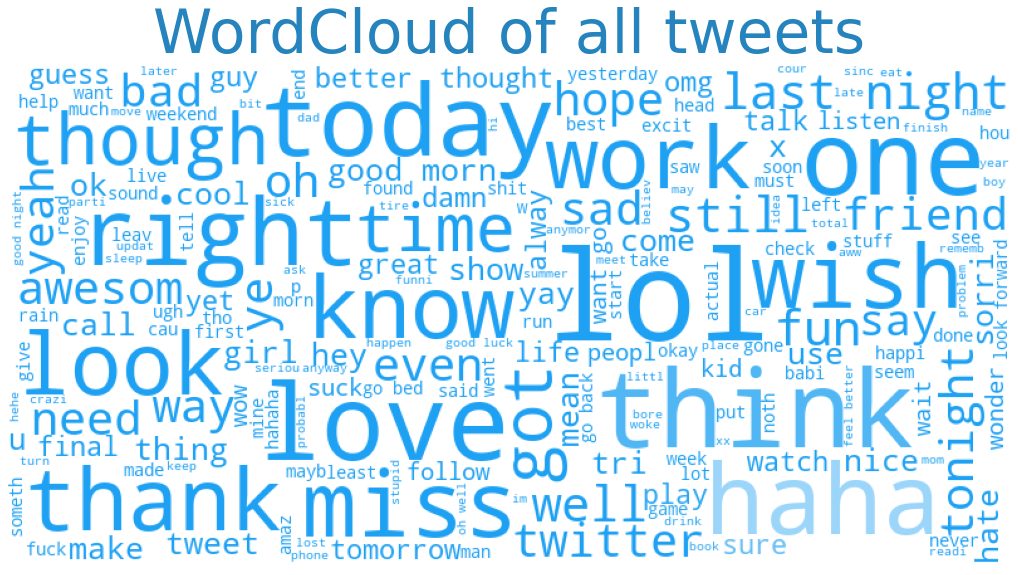

In [30]:
plot_wc(tweets, 'text6', 'WordCloud of all tweets')

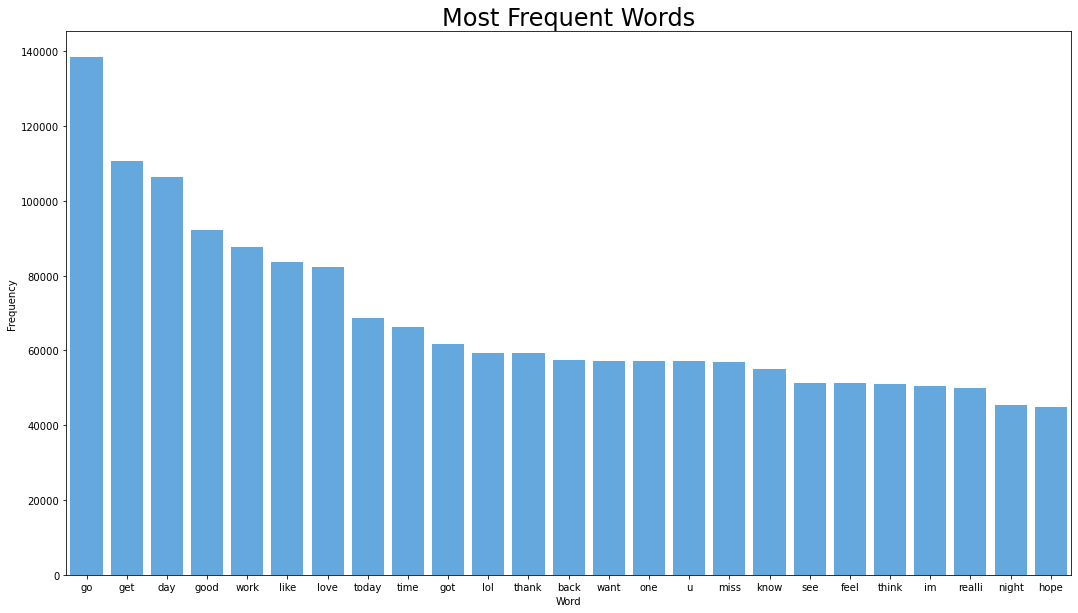

In [31]:
barplot(tweets, 'text6', 'Most Frequent Words')

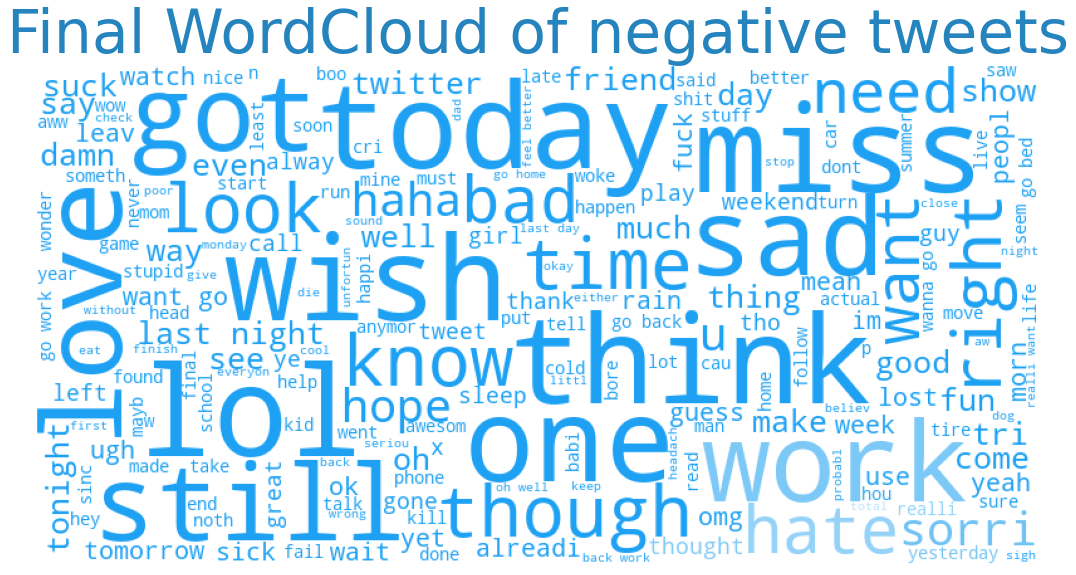

In [32]:
negative_tweets = tweets[tweets['target'] == 0]
plot_wc(negative_tweets, 'text6', 'Final WordCloud of negative tweets')

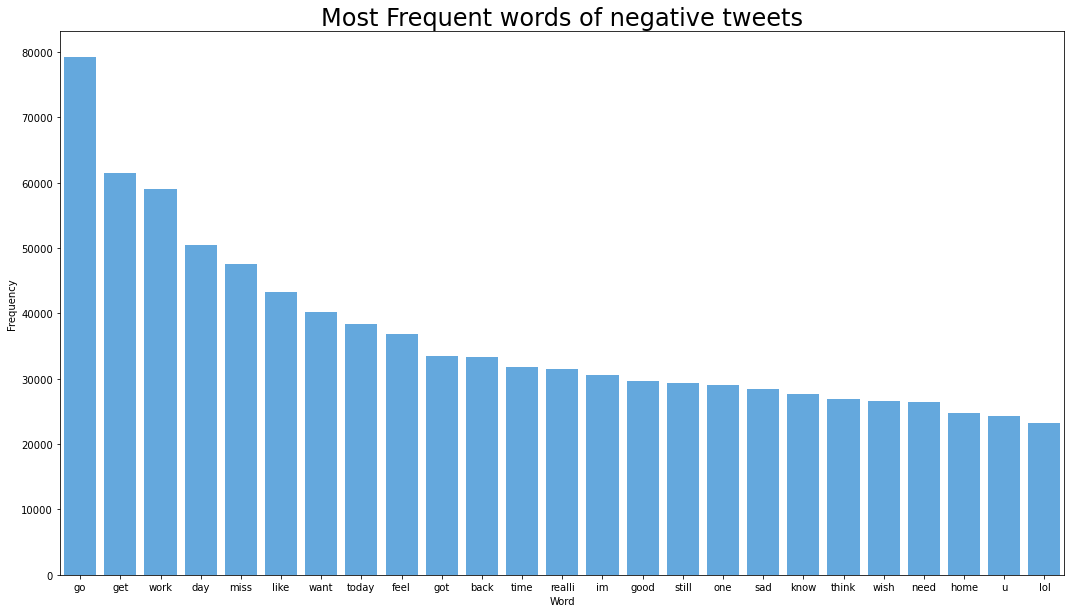

In [33]:
barplot(negative_tweets, 'text6', 'Most Frequent words of negative tweets')

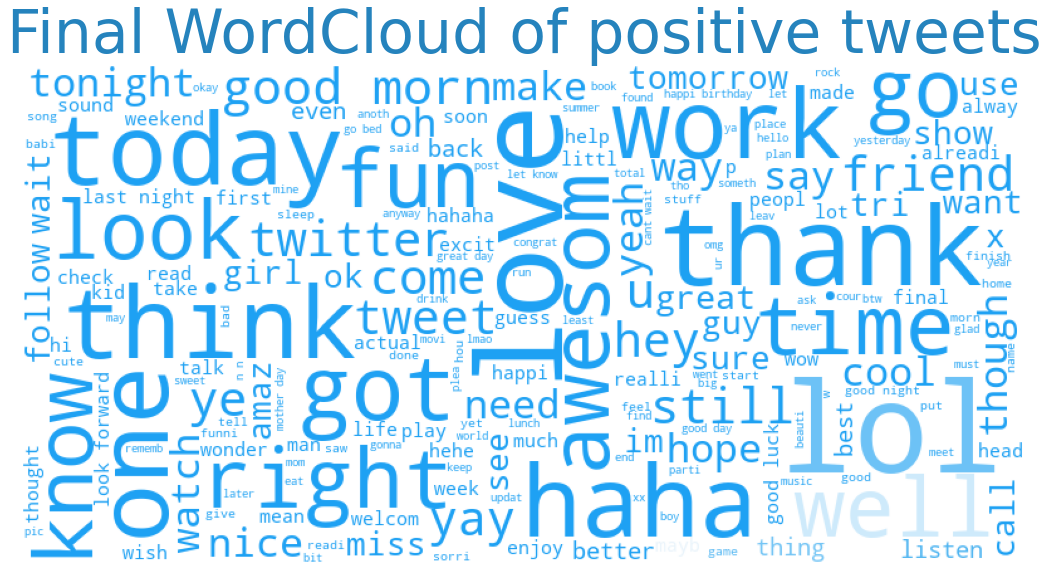

In [34]:
positive_tweets = tweets[tweets['target'] == 1]
plot_wc(positive_tweets, 'text6', 'Final WordCloud of positive tweets')

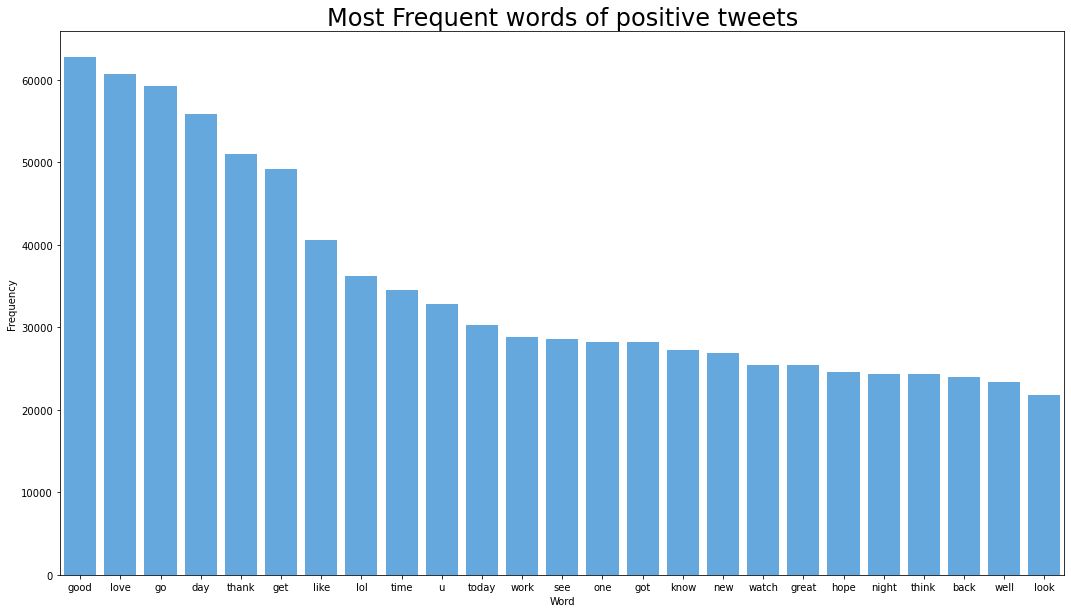

In [35]:
barplot(positive_tweets, 'text6', 'Most Frequent words of positive tweets')

## Printing the most frequent words.

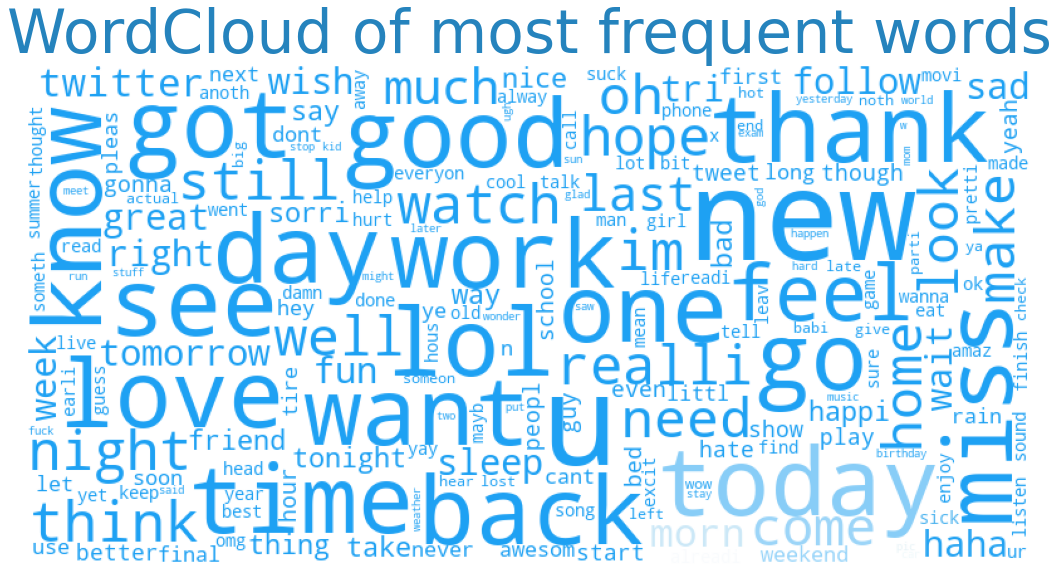

In [36]:
words = ' '.join([text for text in tweets['text6']])
ws_tokenizer = tokenize.WhitespaceTokenizer()
tokens = ws_tokenizer.tokenize(words)
freq = nltk.FreqDist(tokens)
df_freq = pd.DataFrame({'Word': list(freq.keys()), 'Frequency': list(freq.values())})
top_250 = df_freq.nlargest(columns = 'Frequency', n=500)
top_250.reset_index(drop=True, inplace=True)
    
plot_wc(top_250, 'Word', 'WordCloud of most frequent words')

After the comprehensive data cleaning process, which included removing stop-words, punctuation, accented characters, and non-alphabetic characters, as well as applying stemming, the text data is now significantly simplified and standardized. These preprocessing steps have reduced potential sources of noise and inconsistency in the data, making it more suitable for effective text analysis. With the completion of this data cleaning stage, the text data is now prepared and ready for the next part of the project: sentiment classification.

## Saving the dataset in CSV format.

In [37]:
tweets.to_csv('training.1600000.processed.noemoticon_cleaned.csv', sep=',')